Topic 6.07  |  三角网格
# 用三角网格可视化
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [64]:
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 定义符号函数

In [65]:
# 定义一个符号函数
from sympy import symbols
x,y = symbols("x,y")
from sympy import lambdify, exp

f = x*exp(-x**2 - y**2)
f_fcn = lambdify([x,y], f)

### 定义三角剖分点

In [66]:
x_tri = np.asarray([-3., -1.,  1.,  3., -2.,  0.,  2., -1.,  1.,  0.])
y_tri = np.asarray([-3., -3., -3., -3., -1., -1., -1.,  1.,  1.,  3.])

# 生成了10个数据点，其中x和y分别表示每个数据点在x轴和y轴上的坐标

In [67]:
points = np.column_stack([x_tri,y_tri])
points

array([[-3., -3.],
       [-1., -3.],
       [ 1., -3.],
       [ 3., -3.],
       [-2., -1.],
       [ 0., -1.],
       [ 2., -1.],
       [-1.,  1.],
       [ 1.,  1.],
       [ 0.,  3.]])

In [7]:
points.shape

(10, 2)

### 采用 scipy.spatial.Delaunay 完成三角剖分

In [68]:
from scipy.spatial import Delaunay
tri_from_scipy = Delaunay(points)
# scipy.spatial中的Delaunay类可以帮助我们生成一个点集的Delaunay三角剖分，
# 它可以用于构建三角形网格、寻找最近邻、计算凸壳等等

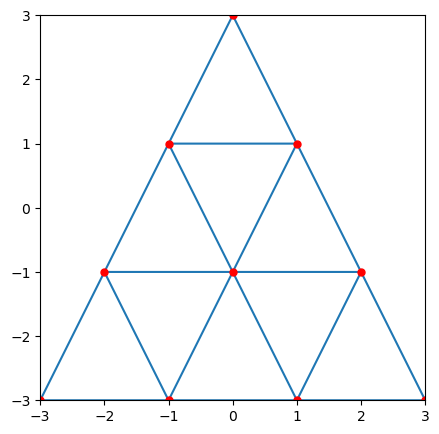

In [69]:
fig, ax = plt.subplots(figsize = (5,5))
ax.triplot(points[:,0], points[:,1], tri_from_scipy.simplices)

# 通过triplot方法，我们可以使用三角形剖分对象来绘制三角形网格

ax.plot(points[:,0], points[:,1], '.r', markersize = 10, lw = 0.25)
ax.set_aspect('equal')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
fig.savefig('Figures/triplot绘制三角剖分网格.svg', format='svg')

### 使用Triangulation

In [70]:
# 自定义哪些点构成一个三角形，逆时针顺序
triangles = [[0, 1, 4], [1, 2, 5], [2, 3, 6], [1, 5, 4], [2, 6, 5], [4, 5, 7],
             [5, 6, 8], [5, 8, 7], [7, 8, 9]]
triang = mtri.Triangulation(x_tri, y_tri, triangles)
# 通过Triangulation方法，我们可以使用x和y数组生成一个三角形剖分对象

### 等高线

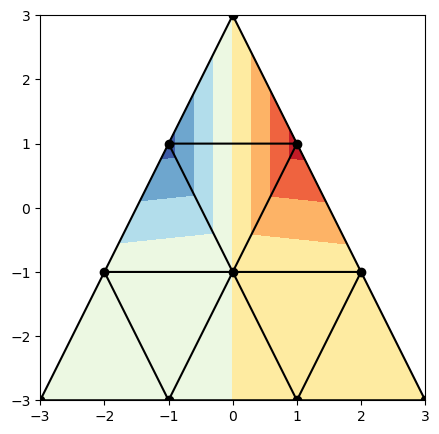

In [71]:
fig, ax = plt.subplots(figsize = (5,5))

# Plot the triangulation.
ax.tricontourf(triang, f_fcn(x_tri, y_tri), cmap = 'RdYlBu_r')
ax.triplot(triang, 'ko-')
ax.set_aspect('equal')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
fig.savefig('Figures/tricontourf绘制三角网格等高线.svg', format='svg')

### 采用Delaunay三角剖分，自动完成三角剖分

In [72]:
triang_auto = mtri.Triangulation(x_tri, y_tri)
# 采用德劳内三角剖分 (Delaunay triangulation)
# 参考：
# https://mathworld.wolfram.com/DelaunayTriangulation.html

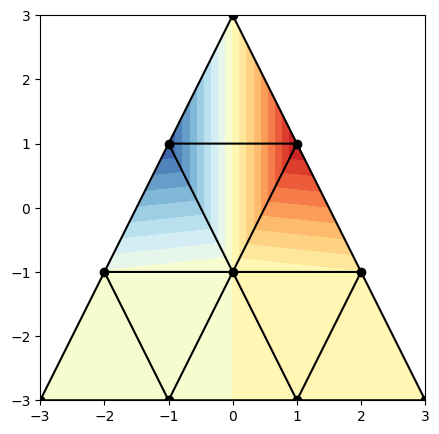

In [73]:
fig, ax = plt.subplots(figsize = (5,5))

# Plot the triangulation.
ax.tricontourf(triang_auto, f_fcn(x_tri, y_tri), 
               cmap = 'RdYlBu_r',
               levels = 20)
ax.triplot(triang_auto, 'ko-')
ax.set_aspect('equal')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
fig.savefig('Figures/自动完成三角剖分.svg', format='svg')

### 网格化散点三角剖分

In [74]:
xx,yy = np.meshgrid(np.linspace(-3,3,20),np.linspace(-3,3,20))
triang_mesh_auto = mtri.Triangulation(xx.ravel(), yy.ravel())

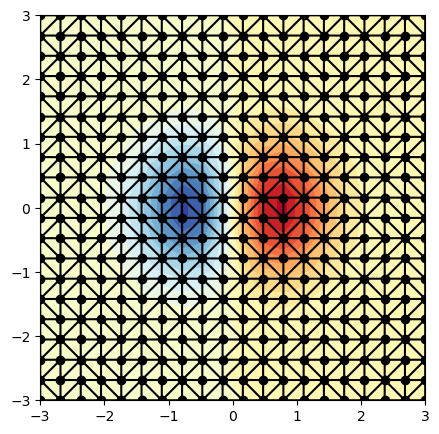

In [75]:
fig, ax = plt.subplots(figsize = (5,5))

# Plot the triangulation.
ax.tricontourf(triang_mesh_auto, f_fcn(xx.ravel(),yy.ravel()),
               cmap = 'RdYlBu_r',
               levels = 20)
ax.triplot(triang_mesh_auto, 'ko-')
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
fig.savefig('Figures/网格化散点三角剖分.svg', format='svg')

### 极坐标网络三角剖分

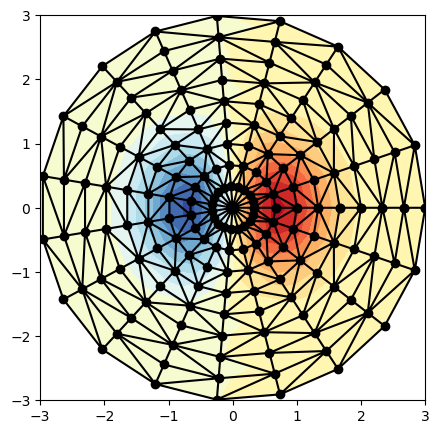

In [76]:
rr, tt = np.meshgrid(np.linspace(3, 0, 10, endpoint = True),
                     np.linspace(0, 2*np.pi, 20, endpoint = True))
xx_polar = rr*np.cos(tt)
yy_polar = rr*np.sin(tt)
triang_polar_auto = mtri.Triangulation(xx_polar.ravel(), yy_polar.ravel())

fig, ax = plt.subplots(figsize = (5,5))

# Plot the triangulation.
ax.tricontourf(triang_polar_auto, f_fcn(xx_polar.ravel(),yy_polar.ravel()),
               cmap = 'RdYlBu_r',
               levels = 20)
ax.triplot(triang_polar_auto, 'ko-')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect('equal', adjustable='box')
fig.savefig('Figures/极坐标网络三角剖分.svg', format='svg')

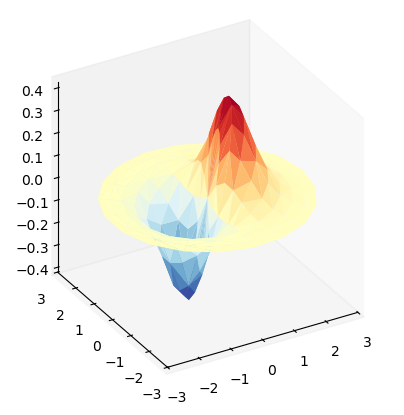

In [77]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_trisurf(xx_polar.ravel(), 
                yy_polar.ravel(), 
                f_fcn(xx_polar.ravel(), yy_polar.ravel()), 
                cmap='RdYlBu_r', linewidth=0.2, shade=False)

surf.set_facecolor((0,0,0,0))
ax.set_proj_type('ortho')
ax.view_init(azim=-120, elev=30)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.grid(False)
ax.set_box_aspect(aspect = (1,1,1))
fig.savefig('Figures/极坐标网络三角剖分，曲面.svg', format='svg')

### 均匀圆盘网格

In [78]:
def circle_points(num_r, num_n):
    
    r = np.linspace(0,3,num_r)
    # print(r)
    # 极轴 [0, 3] 分成若干等份
    
    n = r*num_n + 1
    n = n.astype(int)
    # print(n)
    # 每一层散点数
    
    circles = np.empty((0,2))
    # 创建空数组
    
    for r_i, n_i in zip(r, n):
        
        t_i = np.linspace(0, 2*np.pi, n_i, endpoint=False)
        r_i = np.ones_like(t_i)*r_i
        
        x_i = r_i*np.cos(t_i)
        y_i = r_i*np.sin(t_i)
        # 极坐标到直角坐标系转换
        
        circle_i = np.column_stack([x_i, y_i])
        # print(circle_i)
        circles = np.append(circles,circle_i, axis=0)
        # 拼接极坐标点
        
    return circles

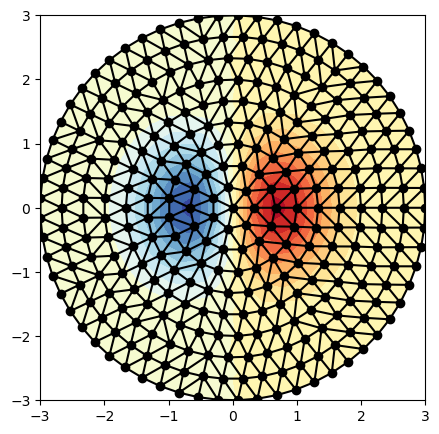

In [79]:
points_circles = circle_points(10, 20)
triang_circles_auto = mtri.Triangulation(points_circles[:,0], points_circles[:,1])

fig, ax = plt.subplots(figsize = (5,5))

# Plot the triangulation.
ax.tricontourf(triang_circles_auto, f_fcn(points_circles[:,0], points_circles[:,1]),
               cmap = 'RdYlBu_r',
               levels = 20)
ax.triplot(triang_circles_auto, 'ko-')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect('equal', adjustable='box')
fig.savefig('Figures/均匀圆盘网格，等高线.svg', format='svg')

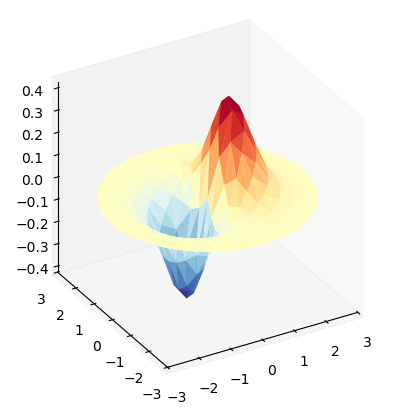

In [81]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection='3d')

# ax.scatter(points_circles[:,0], 
#                 points_circles[:,1], 
#                 f_fcn(points_circles[:,0], points_circles[:,1]), zorder = 1e6, c = 'k')

surf = ax.plot_trisurf(points_circles[:,0], 
                points_circles[:,1], 
                f_fcn(points_circles[:,0], points_circles[:,1]), 
                cmap='RdYlBu_r', linewidth=0.2, shade=False)

surf.set_facecolor((0,0,0,0))
ax.set_proj_type('ortho')
ax.view_init(azim=-120, elev=30)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.grid(False)
ax.set_box_aspect(aspect = (1,1,1))
fig.savefig('Figures/均匀圆盘网格，曲面.svg', format='svg')

### 不规则三角形

In [82]:
x_sq, y_sq = np.random.rand(2, 100)*6 - 3
points_rnd_sq = np.column_stack([x_sq,y_sq])
tri_points_rnd_sq_from_scipy = Delaunay(points_rnd_sq)

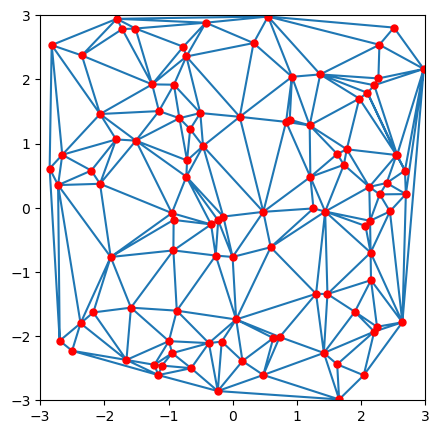

In [83]:
fig, ax = plt.subplots(figsize = (5,5))
ax.triplot(points_rnd_sq[:,0], points_rnd_sq[:,1], tri_points_rnd_sq_from_scipy.simplices)
ax.plot(points_rnd_sq[:,0], points_rnd_sq[:,1], '.r', markersize = 10)

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect('equal', adjustable='box')
fig.savefig('Figures/不规则三角形网格.svg', format='svg')

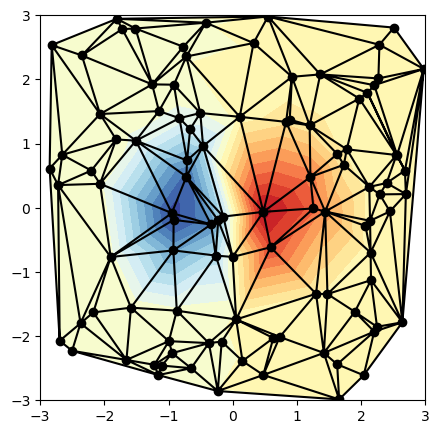

In [84]:

triang_auto_rnd_sq = mtri.Triangulation(points_rnd_sq[:,0], points_rnd_sq[:,1])

fig, ax = plt.subplots(figsize = (5,5))

# Plot the triangulation.
ax.tricontourf(triang_auto_rnd_sq, f_fcn(points_rnd_sq[:,0], points_rnd_sq[:,1]),
               cmap = 'RdYlBu_r',
               levels = 20)
ax.triplot(triang_auto_rnd_sq, 'ko-')

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect('equal', adjustable='box')
fig.savefig('Figures/不规则三角形网格，等高线.svg', format='svg')

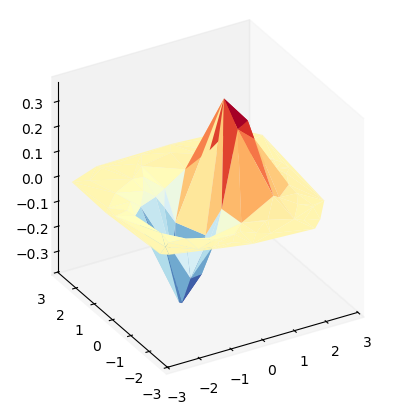

In [85]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection='3d')

# ax.scatter(points_circles[:,0], 
#                 points_circles[:,1], 
#                 f_fcn(points_circles[:,0], points_circles[:,1]), zorder = 1e6, c = 'k')

surf = ax.plot_trisurf(points_rnd_sq[:,0], 
                points_rnd_sq[:,1], 
                f_fcn(points_rnd_sq[:,0], points_rnd_sq[:,1]), 
                cmap='RdYlBu_r', linewidth=0.2, shade=False)

surf.set_facecolor((0,0,0,0))
ax.set_proj_type('ortho')
ax.view_init(azim=-120, elev=30)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.grid(False)
ax.set_box_aspect(aspect = (1,1,1))
fig.savefig('Figures/不规则三角形网格，曲面.svg', format='svg')

请大家自学：  
https://matplotlib.org/stable/gallery/images_contours_and_fields/trigradient_demo.html  
https://matplotlib.org/stable/gallery/mplot3d/trisurf3d.html

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023